In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
data_bra = pd.read_csv(r'D:\python data\bra\bra.csv') 
data_color = pd.read_csv(r'D:\python data\bra\colors.csv',names=['productColor','productcolor'],header = 0)
data_bra,data_color


(              creationTime productColor productSize
 0      2016-06-08 17:17:00        22咖啡色         75C
 1      2017-04-07 19:34:25        22咖啡色         80B
 2      2016-06-18 19:44:56         02粉色         80C
 3      2017-08-03 20:39:18        22咖啡色         80B
 4      2016-07-06 14:02:08        22咖啡色         75B
 5      2017-03-18 11:49:55        22咖啡色         80B
 6      2017-01-13 13:43:06        22咖啡色         80B
 7      2016-07-10 22:22:56        22咖啡色         80B
 8      2016-07-15 14:34:23        22咖啡色         80B
 9      2017-03-27 12:54:43        22咖啡色         70C
 10     2016-06-13 22:04:31         02粉色         75B
 11     2016-06-19 10:38:05        22咖啡色         80C
 12     2017-06-28 19:14:33        22咖啡色         75C
 13     2016-07-18 12:53:34         02粉色         80C
 14     2017-04-26 00:01:15        22咖啡色         75B
 15     2017-07-07 20:55:36        22咖啡色         75C
 16     2017-07-24 20:27:05        22咖啡色         70C
 17     2017-06-23 14:08:19        22咖啡色      

In [2]:
bra = pd.merge(data_bra, data_color, on = 'productColor', how = 'left')    #合并
bra.dropna(how = 'any', subset = ['productcolor','productSize'], inplace = True)    #删除带num的行
print(bra)
size = pd.unique(bra['productSize'])    #从列中提取唯一值并有序排列
color = pd.unique(bra['productcolor'])
size, color

              creationTime productColor productSize productcolor
0      2016-06-08 17:17:00        22咖啡色         75C           棕色
1      2017-04-07 19:34:25        22咖啡色         80B           棕色
2      2016-06-18 19:44:56         02粉色         80C           粉色
3      2017-08-03 20:39:18        22咖啡色         80B           棕色
4      2016-07-06 14:02:08        22咖啡色         75B           棕色
5      2017-03-18 11:49:55        22咖啡色         80B           棕色
6      2017-01-13 13:43:06        22咖啡色         80B           棕色
7      2016-07-10 22:22:56        22咖啡色         80B           棕色
8      2016-07-15 14:34:23        22咖啡色         80B           棕色
9      2017-03-27 12:54:43        22咖啡色         70C           棕色
10     2016-06-13 22:04:31         02粉色         75B           粉色
11     2016-06-19 10:38:05        22咖啡色         80C           棕色
12     2017-06-28 19:14:33        22咖啡色         75C           棕色
13     2016-07-18 12:53:34         02粉色         80C           粉色
14     2017-04-26 00:01:1

(array(['75C', '80B', '80C', '75B', '70C', '85B', '70B', '85C', '75C/34C',
        '80B/36B', '85C/38C', '85A/38A', '85B/38B', '80A/36A', '70A/32A',
        '80C/36C', '75B/34B', '75A/34A', '70B/32B', '70C/32C', 'B80',
        'B75', 'C80', '170/82/XL', 'C75', '160/70/M', 'B70', '165/76/L',
        'C70', '90C/40C', '90B/40B', '85D/38D', '85B+(内裤)套装', '85E/38E',
        '80D/36D', '90D/40D', '80E/36E', '75E/34E', '90E/40E', '75D/34D',
        '95C', '95E', '85E+(内裤)套装', '95D', '75B+(内裤)套装', '75B=34B',
        '80B=36B', '80C=36C', '90D=40D', '85B=38B', '80A=36A', '85C=38C',
        '90B=40B', '75A=34A', '90C=40C', '85A=38A', '75C=34C', '85/38C',
        '75B/34', '85B/38', '80B/36', '70B/32', 'A75', 'A80', 'A70', '75A',
        '80A', '70A', '85A', '70A=32A', '70B=32B', 'A85', 'C85', 'B85',
        '90C', '40/90A=XL码', '34/75D=L码', '32/70B=S码', '36/80B=L码',
        '38/85A=L码', '38/85C=XL码', '36/80C=L码', '38/85B=XL码', '38/85D=XL码',
        '34/75B=M码', '34/75C=M码', '34/75A=S码', '40/90C

In [3]:
a = re.compile(r'1\d\d\/\d\d\/[a-zA-Z][a-zA-Z]?|[7-9]\d\w\w')    #找到175/70/xl和75ab这两种数据
for i in range(len(bra['productSize'])): 
    try:
        productSize_a = a.findall(bra['productSize'][i])
        if productSize_a:
            bra.drop(i,axis = 0,inplace = True)
    except:
        continue
bra.index = range(len(bra))    #更新索引
print(bra)
size = pd.unique(bra['productSize'])
size
            

              creationTime productColor productSize productcolor
0      2016-06-08 17:17:00        22咖啡色         75C           棕色
1      2017-04-07 19:34:25        22咖啡色         80B           棕色
2      2016-06-18 19:44:56         02粉色         80C           粉色
3      2017-08-03 20:39:18        22咖啡色         80B           棕色
4      2016-07-06 14:02:08        22咖啡色         75B           棕色
5      2017-03-18 11:49:55        22咖啡色         80B           棕色
6      2017-01-13 13:43:06        22咖啡色         80B           棕色
7      2016-07-10 22:22:56        22咖啡色         80B           棕色
8      2016-07-15 14:34:23        22咖啡色         80B           棕色
9      2017-03-27 12:54:43        22咖啡色         70C           棕色
10     2016-06-13 22:04:31         02粉色         75B           粉色
11     2016-06-19 10:38:05        22咖啡色         80C           棕色
12     2017-06-28 19:14:33        22咖啡色         75C           棕色
13     2016-07-18 12:53:34         02粉色         80C           粉色
14     2017-04-26 00:01:1

array(['75C', '80B', '80C', '75B', '70C', '85B', '70B', '85C', '75C/34C',
       '80B/36B', '85C/38C', '85A/38A', '85B/38B', '80A/36A', '70A/32A',
       '80C/36C', '75B/34B', '75A/34A', '70B/32B', '70C/32C', 'B80',
       'B75', 'C80', 'C75', 'B70', 'C70', '90C/40C', '90B/40B', '85D/38D',
       '85B+(内裤)套装', '85E/38E', '80D/36D', '90D/40D', '80E/36E',
       '75E/34E', '90E/40E', '75D/34D', '95C', '95E', '85E+(内裤)套装', '95D',
       '75B+(内裤)套装', '75B=34B', '80B=36B', '80C=36C', '90D=40D',
       '85B=38B', '80A=36A', '85C=38C', '90B=40B', '75A=34A', '90C=40C',
       '85A=38A', '75C=34C', '85/38C', '75B/34', '85B/38', '80B/36',
       '70B/32', 'A75', 'A80', 'A70', '75A', '80A', '70A', '85A',
       '70A=32A', '70B=32B', 'A85', 'C85', 'B85', '90C', '40/90A=XL码',
       '34/75D=L码', '32/70B=S码', '36/80B=L码', '38/85A=L码', '38/85C=XL码',
       '36/80C=L码', '38/85B=XL码', '38/85D=XL码', '34/75B=M码', '34/75C=M码',
       '34/75A=S码', '40/90C=XL码', '36/80A=M码', '75B=34B ', '75B=34AB',
       

In [4]:
b = re.compile(r'[7-9]\d\w')    #带有75B类型的标准数据
c = re.compile(r'\w[7-9]\d')    #需要转换的B75类型的数据
d = re.compile(r'([7-9]\d)\/\d\d(\w)')    #85/38C类型
for i in range(len(bra['productSize'])):
    try:
        productSize_b = b.findall(bra['productSize'][i])
        productSize_c = c.findall(bra['productSize'][i])
        productSize_d = d.findall(bra['productSize'][i])
        if productSize_b:
            bra['productSize'][i] = productSize_b[0].upper()
        if productSize_c:
            bra['productSize'][i] = productSize_c[0][1:] + productSize_c[0][0].upper()
        if productSize_d:
            bra['productSize'][i] = productSize_d[0][0] + productSize_d[0][1].upper()
    except:
        continue
bra.index = range(len(bra))    #更新索引
print(bra)
size = pd.unique(bra['productSize'])
size
            

              creationTime productColor productSize productcolor
0      2016-06-08 17:17:00        22咖啡色         75C           棕色
1      2017-04-07 19:34:25        22咖啡色         80B           棕色
2      2016-06-18 19:44:56         02粉色         80C           粉色
3      2017-08-03 20:39:18        22咖啡色         80B           棕色
4      2016-07-06 14:02:08        22咖啡色         75B           棕色
5      2017-03-18 11:49:55        22咖啡色         80B           棕色
6      2017-01-13 13:43:06        22咖啡色         80B           棕色
7      2016-07-10 22:22:56        22咖啡色         80B           棕色
8      2016-07-15 14:34:23        22咖啡色         80B           棕色
9      2017-03-27 12:54:43        22咖啡色         70C           棕色
10     2016-06-13 22:04:31         02粉色         75B           粉色
11     2016-06-19 10:38:05        22咖啡色         80C           棕色
12     2017-06-28 19:14:33        22咖啡色         75C           棕色
13     2016-07-18 12:53:34         02粉色         80C           粉色
14     2017-04-26 00:01:1

array(['75C', '80B', '80C', '75B', '70C', '85B', '70B', '85C', '85A',
       '80A', '70A', '75A', '90C', '90B', '85D', '85E', '80D', '90D',
       '80E', '75E', '90E', '75D', '95C', '95E', '95D', '90A'],
      dtype=object)

In [9]:
size = bra['productSize'].value_counts()
color = bra['productcolor'].value_counts()
size_color = pd.Series(bra['productSize'] + bra['productcolor']).value_counts()
print(size)
print(color)
print(size_color)

75B    6954
80B    3968
85B     998
80C     581
70B     459
75A     424
75D     360
75C     356
80A     270
85C     259
70A     171
85A      99
90C      39
70C      27
90D      21
90B      20
85D      20
80D      18
85E      17
80E       8
75E       5
95D       4
95C       4
90A       4
90E       3
95E       1
Name: productSize, dtype: int64
蓝色    3270
红色    2600
紫色    2505
黑色    2107
肤色    2066
粉色    2000
黄色     268
灰色     126
绿色      97
棕色      51
Name: productcolor, dtype: int64
75B紫色    2130
80B蓝色    1532
75B粉色    1188
80B红色    1137
75B蓝色    1133
75B红色    1113
75B黑色     775
75B肤色     519
85B黑色     470
80B粉色     430
80B黑色     372
75D肤色     352
85B肤色     327
80B肤色     322
80C蓝色     188
80B紫色     103
80C黑色     100
70B蓝色      98
75A肤色      97
80C红色      92
75C蓝色      89
80C肤色      87
70B黑色      79
70B紫色      74
80A肤色      72
70B粉色      71
85C黑色      71
75C黑色      70
75A黑色      64
85C肤色      61
         ... 
80C棕色       4
70C棕色       4
90C蓝色       3
95C粉色       3
85B灰色       3
70C肤色    

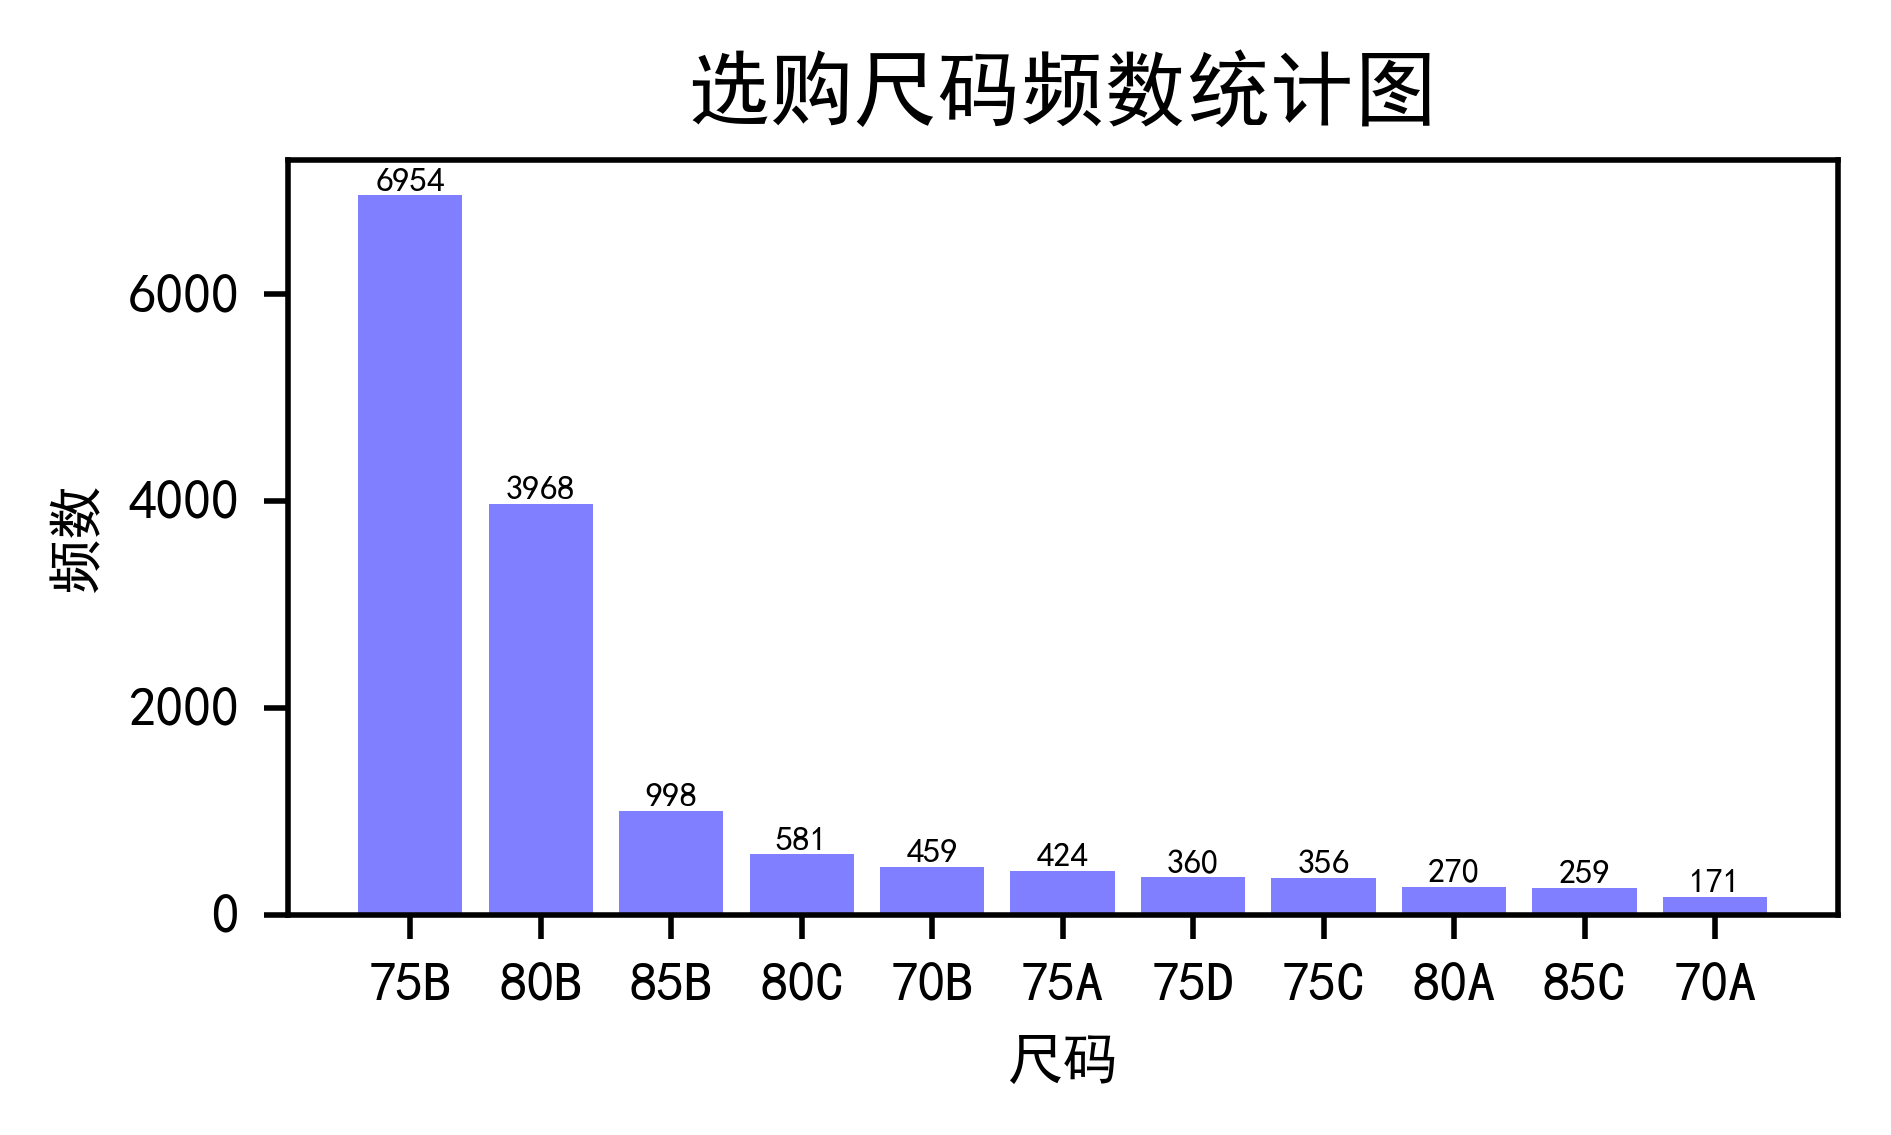

In [6]:
plt.figure(figsize = (4,2), dpi = 500)
x=size.keys()[:11]
y=size.values[:11]
plt.bar(x,y,color='b',alpha=0.5)
plt.yticks(fontsize=8)
plt.xticks(rotation=0,fontsize=8)
plt.ylabel('频数',fontsize=8)
plt.xlabel('尺码',fontsize=8)
plt.title('选购尺码频数统计图')
for a,b in zip(x,y):
    plt.text(a,b,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=5)
plt.show()

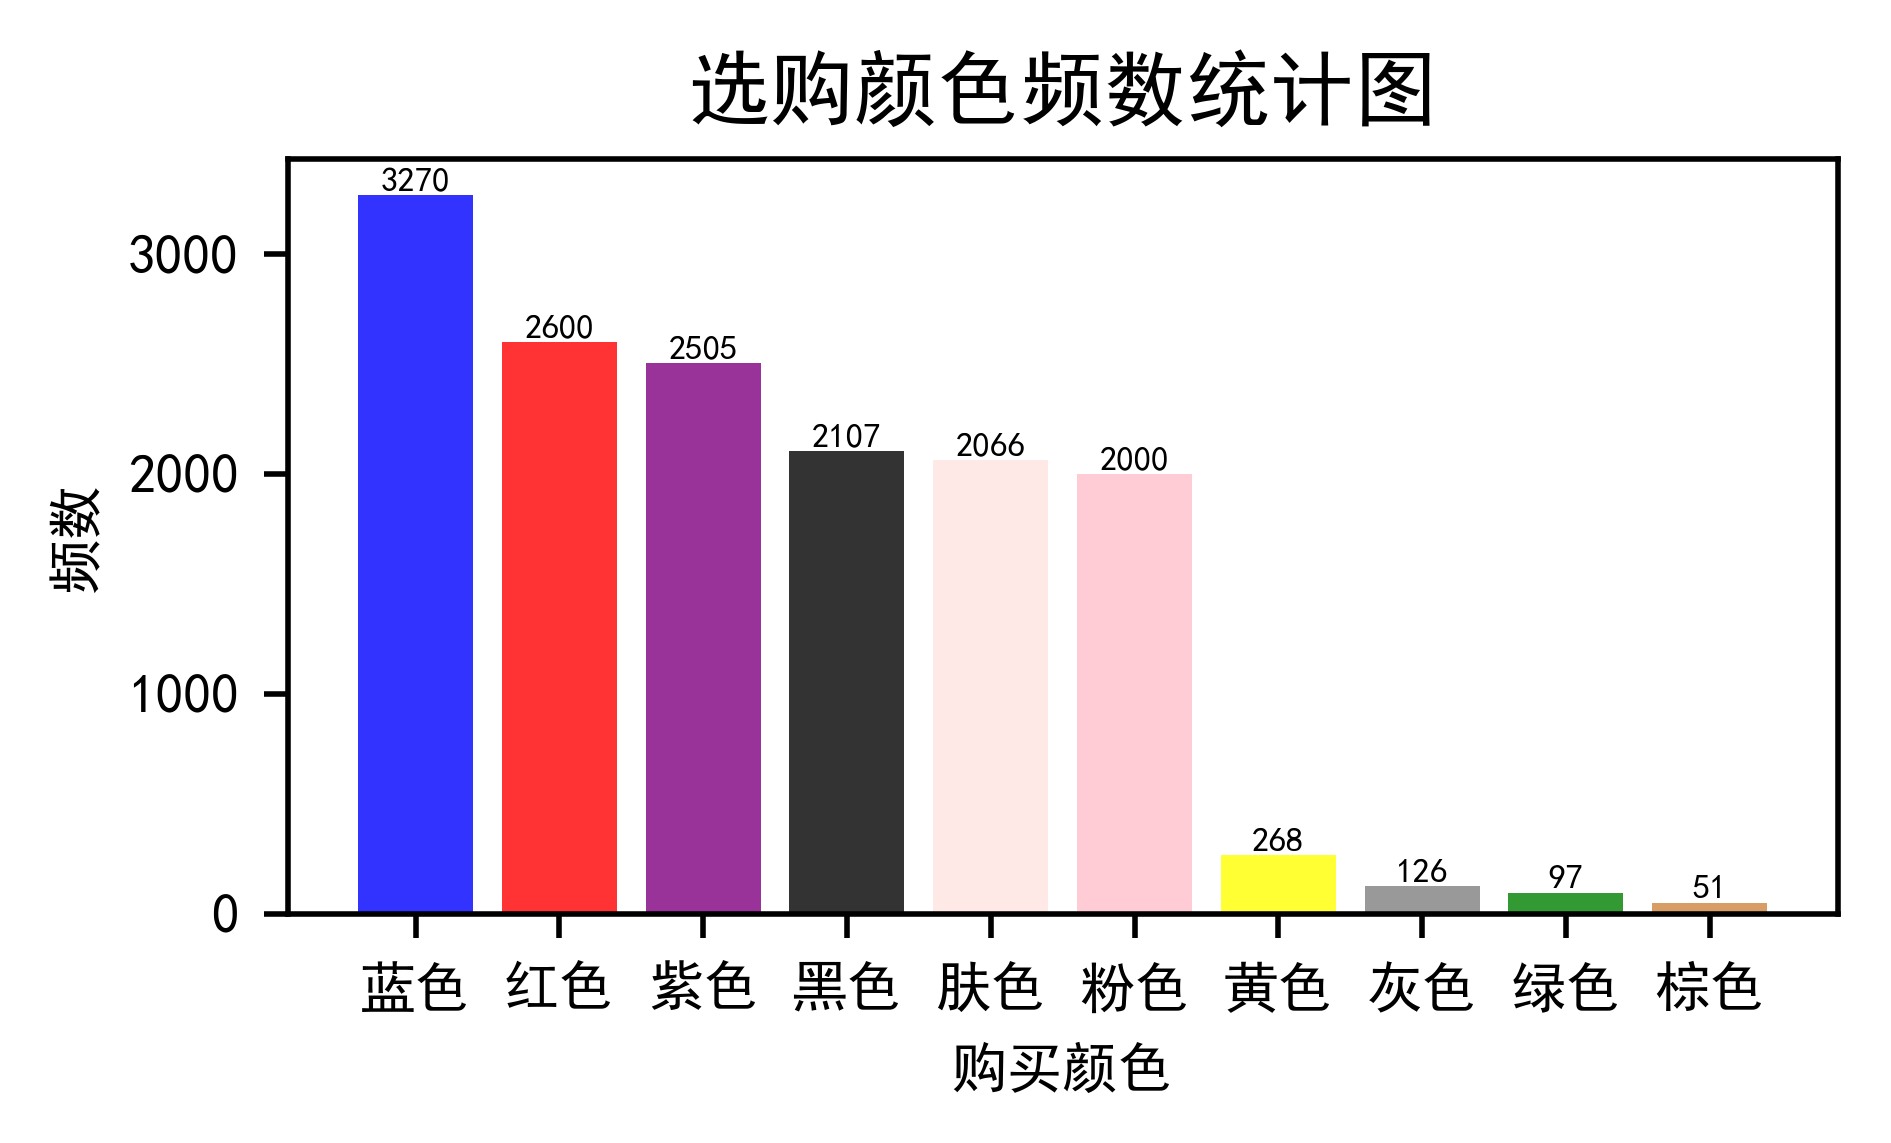

In [7]:
plt.figure(figsize = (4,2), dpi = 500)
x = color.keys()[:10]
y = color.values[:10]
plt.bar(x,y,color=('b','r','purple','k','mistyrose','pink','yellow','grey','green','peru'),alpha=0.8)
plt.yticks(fontsize=8)
plt.xticks(rotation=0,fontsize=8)
plt.ylabel('频数',fontsize=8)
plt.xlabel('购买颜色',fontsize=8)
plt.title('选购颜色频数统计图')
for a,b in zip(x,y):
    plt.text(a,b,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=5)
plt.show()

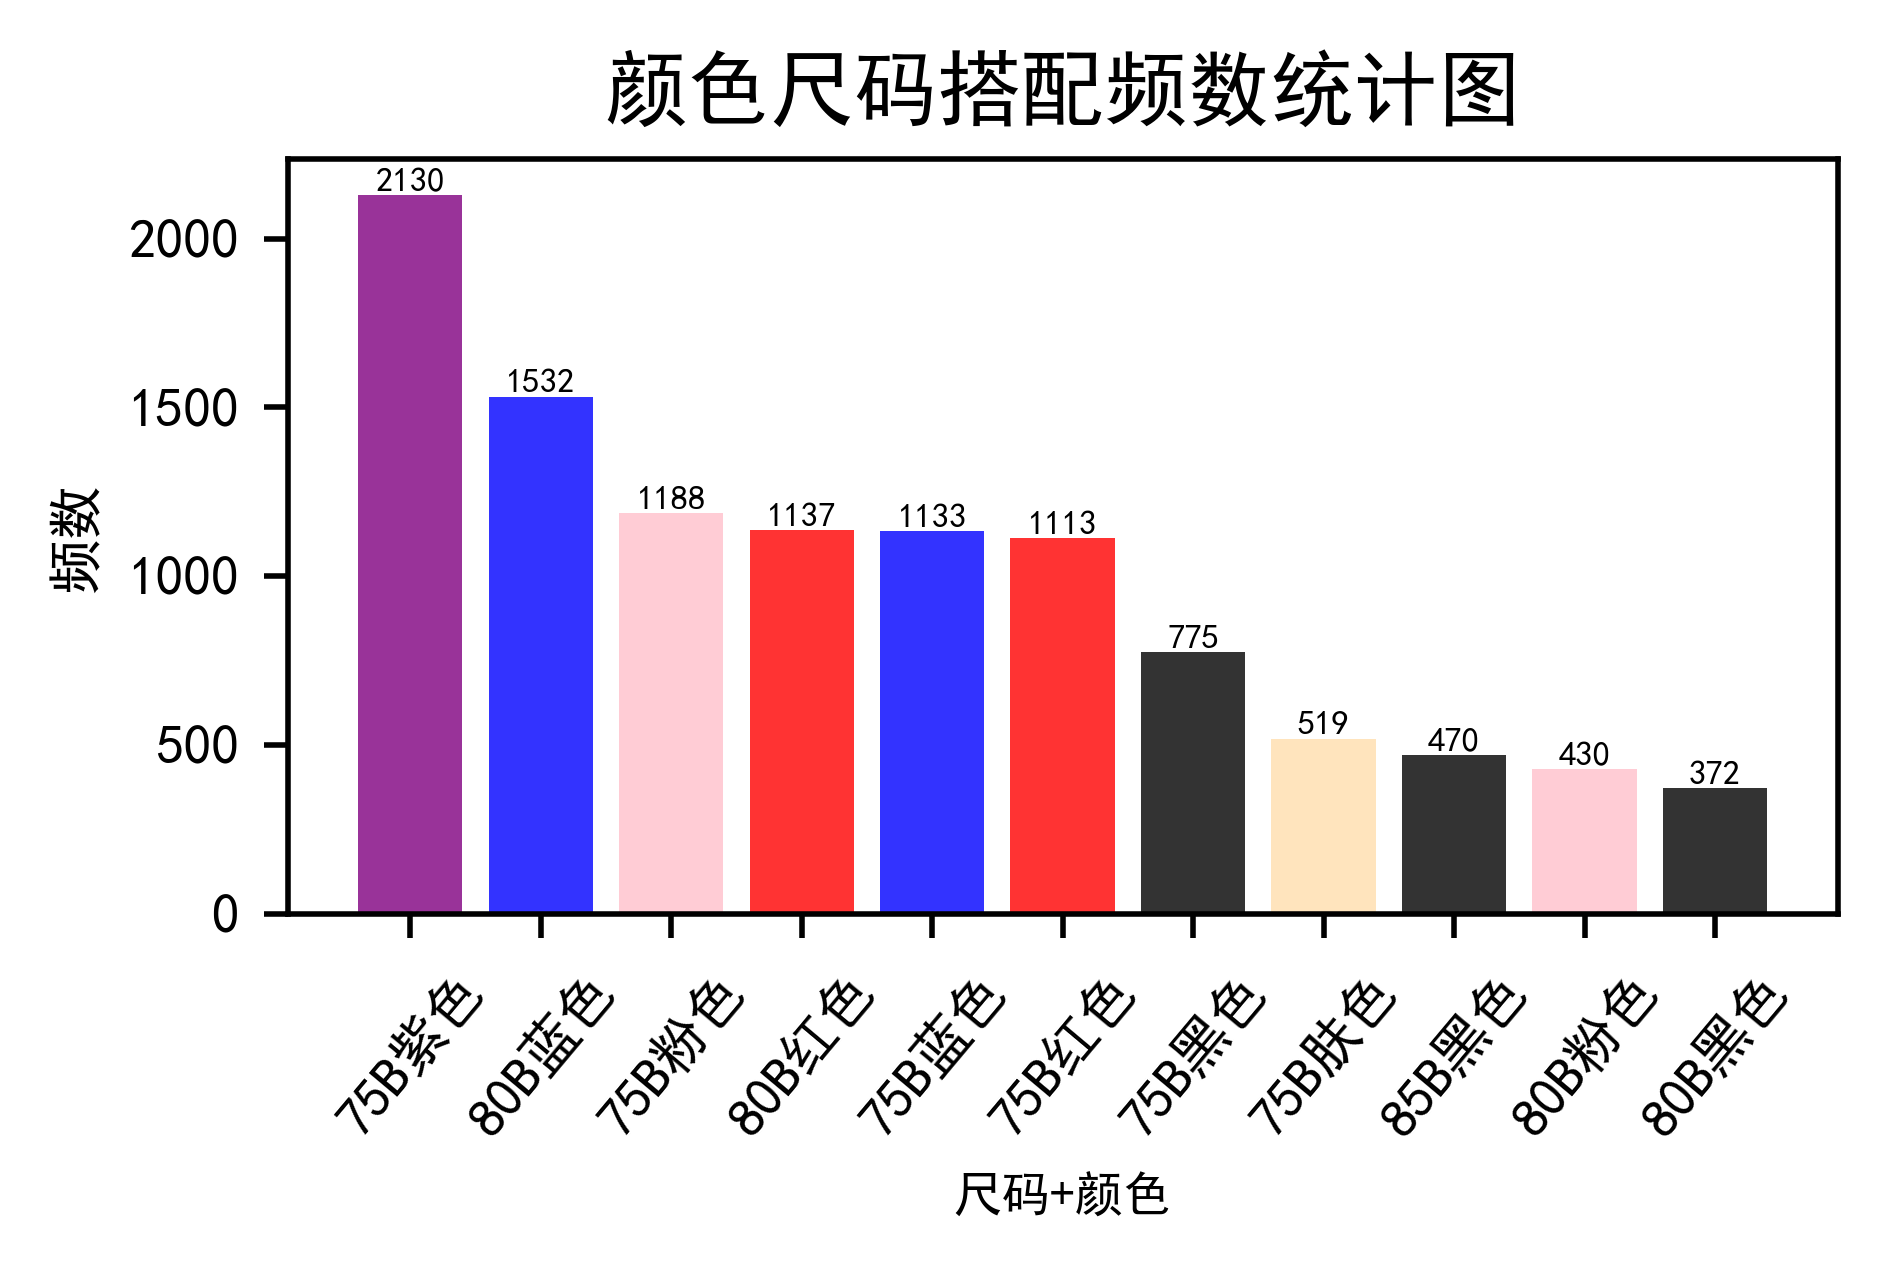

In [8]:
plt.figure(figsize = (4,2), dpi = 500)
x=size_color.keys()[:11]
y=size_color.values[:11]
plt.bar(x,y,color=('purple','b','pink','r','b','r','k','navajowhite','k','pink','k'),alpha=0.8)
plt.yticks(fontsize=8)
plt.xticks(rotation=50,fontsize=8)
plt.ylabel('频数',fontsize=8)
plt.xlabel('尺码+颜色',fontsize=7)
plt.title('颜色尺码搭配频数统计图')
for a,b in zip(x,y):
    plt.text(a,b,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=5)
plt.show()